## Convolutional Neural Networks for Image Classification

In [45]:
from keras.datasets import mnist
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import tensorflow as tf


In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data(())

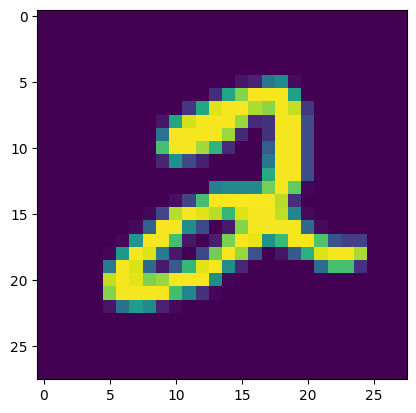

In [44]:
plt.imshow(X_train[5])

In [47]:
X_train=X_train.astype('float32') /255.0
X_test=X_test.astype('float32') /255.0

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)



In [48]:
K.clear_session()

model = Sequential()
model.add(tf.keras.layers.Input((28,28,1)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer='rmsprop',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.fit(X_train,y_train_cat,batch_size=128,epochs=20,verbose=1,validation_split=0.3)

Epoch 1/20


2025-06-20 00:20:48.710698: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_505', 4 bytes spill stores, 4 bytes spill loads



329/329 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8116 - loss: 0.5778 - val_accuracy: 0.9647 - val_loss: 0.1124
Epoch 2/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9729 - loss: 0.0844 - val_accuracy: 0.9697 - val_loss: 0.0950
Epoch 3/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9809 - loss: 0.0583 - val_accuracy: 0.9721 - val_loss: 0.0902
Epoch 4/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9859 - loss: 0.0443 - val_accuracy: 0.9761 - val_loss: 0.0787
Epoch 5/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9877 - loss: 0.0360 - val_accuracy: 0.9827 - val_loss: 0.0571
Epoch 6/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9902 - loss: 0.0302 - val_accuracy: 0.9849 - val_loss: 0.0515
Epoch 7/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9926 - loss: 0.0240 - val_accuracy: 0.9859 - val_loss: 0.0478
Epoch 8/20
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9874 - va

In [25]:
model.evaluate(X_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9780 - loss: 0.0716


[0.05951583385467529, 0.9819999933242798]

## Image Classification of Cifar Dataset

In [1]:
from keras.datasets import cifar10


2025-06-19 22:41:38.110653: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-19 22:41:38.129275: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750387298.150914   61575 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750387298.158634   61575 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750387298.186050   61575 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

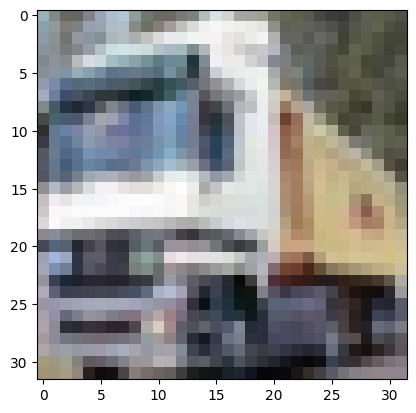

In [8]:
plt.imshow(X_train[1])

In [ ]:
X_train= X_train.astype('float32') /255.0
X_test= X_test.astype('float32') /255.0

y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

y_train_cat.shape


(50000, 10)

In [26]:
model2= Sequential()
model2.add(tf.keras.layers.Input(shape=(32,32,3)))
model2.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model2.add(Conv2D(32,(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dense(10,activation='softmax'))

model2.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [27]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model2.fit(X_train,y_train_cat,batch_size=32,epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1014 - loss: 2.3027
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0984 - loss: 2.3028
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0979 - loss: 2.3028
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0989 - loss: 2.3026
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0974 - loss: 2.3027
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1017 - loss: 2.3026
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1001 - loss: 2.3027
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0991 - loss: 2.3028
Epoch 9/20
 483/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0950 - loss: 2.3028

KeyboardInterrupt: 

In [23]:
model2.evaluate(X_test,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0995 - loss: 2.3026


[2.30260968208313, 0.10000000149011612]

In [22]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
